# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ida Bagus Gilang Parayoga]
- **Email:** [gparayoga@gmail.com]
- **ID Dicoding:** [ibgilang]

## Menentukan Pertanyaan Bisnis

- Berapa total pelanggan yang menyewa sepeda di tiap musimnya?
- Bagaimana trend penjualan sistem sewa sepeda dalam beberapa tahun ini?
- Berapa jumlah perbandingan dari pelanggan yang registrasi dengan yang casual?

## Import Semua Packages/Library yang Digunakan

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [40]:


# Memuat tabel hari
hari_df = pd.read_csv("data/day.csv")
hari_df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
# Memuat tabel jam
jam_df = pd.read_csv("data/hour.csv")
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Memuat tabel hari dan jam dengan fungsi pd.read_csv, disini bisa kita lihat kolom yang ada pada kedua tabel ini

### Assessing Data

In [42]:
# memeriksa kolom serta tipe data yang ada pada tabel hari dan jam
hari_df.info()
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [43]:

# mengecek tabel hari dan jam apakah ada missing value
hari_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [44]:
jam_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- dari hasil run code diatas , kita bisa tahu bahwa di tabel hari dan jam tidak ada kolom yg kosong

In [45]:
# memeriksa apakah ada baris yg duplikat didalam tabel hari dan jam
print("Jumlah duplikasi: ", hari_df.duplicated().sum())
print("Jumlah duplikasi: ", jam_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


- dari hasil run code diatas, kita tahu bahwa tidak ada baris yang duplikat pada tabel hari maupun jam.

In [46]:
hari_df.describe()
jam_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- hasil dari code diatas menunjukan bahwa tabel ini berisi 17379 baris,
- mean 6,53 ( kolom mnth) yang artinya data ini memiliki rata rata dibulan jun/jul ,
- mean 11.54 (kolom hr) yang artinya terdapat data pada pukul 11.54
- std 49.3 (kolom casual) yang artinya ada banyak pelanggan tidak melakukan registrasi
- min 0 (kolom hr) artinya ada jam dimana tidak ada orang yang menyewa sepeda

### Cleaning Data


-Dropping


In [47]:
# kita akan menghapus kolom instant karena tidak akan digunakan
hari_df.drop(['instant'], axis = 1, inplace= True)
jam_df.drop(['instant'], axis = 1, inplace= True)


-Mengubah tipe data

In [48]:
# mengubah tipe data dteday menjadi dari 'object' ke 'datetime'
hari_df['dteday'] = pd.to_datetime(hari_df['dteday'])
jam_df['dteday'] = pd.to_datetime(jam_df['dteday'])

-Mengubah beberapa kolom sesuai dengan kebutuhan (year, month, weather,season)

In [49]:
# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',
    8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

hari_df['mnth'] = hari_df['mnth'].map(month_map)
jam_df['mnth'] = jam_df['mnth'].map(month_map)

In [50]:
# mengubah year dimana 0:2011, 1:2012
hari_df.yr.replace((0,1), ('2011','2012'), inplace=True)
jam_df.yr.replace((0,1), ('2011','2012'), inplace=True)

C:\Users\Gilang\AppData\Local\Temp\ipykernel_1176\1486522394.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hari_df.yr.replace((0,1), ('2011','2012'), inplace=True)
C:\Users\Gilang\AppData\Local\Temp\ipykernel_1176\1486522394.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [51]:
# mengubah season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
hari_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
jam_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

C:\Users\Gilang\AppData\Local\Temp\ipykernel_1176\2737763842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hari_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
C:\Users\Gilang\AppData\Local\Temp\ipykernel_1176\2737763842.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [ ]:
# mengubah weathersit menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hari_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
jam_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

In [ ]:
# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hari_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
jam_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [70]:
# Menghitung Humidity
hari_df['hum'] = hari_df['hum']*100
jam_df['hum'] = jam_df['hum']*100

In [54]:
hari_df.info()
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    object        
 3   mnth        731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 85.8+ 

- kode diatas berfungsi untuk mengecek apakah mengubah tipe data pada tabel hari dan jam setelah di rubah

In [55]:
# Membuat kolom baru kategori hari
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def kategori_hari(weekday):
    if weekday in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

jam_df["kategori_hari"] = jam_df["weekday"].apply(kategori_hari)
hari_df["kategori_hari"] = hari_df["weekday"].apply(kategori_hari)

In [71]:
def kelembaban(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

jam_df["humidity_category"] = jam_df["hum"].apply(kelembaban)
hari_df["humidity_category"] = hari_df["hum"].apply(kelembaban)


kemsimpulan dari kode yang sudah dijalankan diatas
-kita sudah menghapus kolom instant
-merubah tipe data pada kolom dteday sudah berubah menjadi datetime 
-sudah mengganti nama kolom sesuai kebutuhan 
-sudah mengubah isi kolom dan membuat kolom baru yaitu kategori hari


In [72]:
#menyimpan data yang sudah dimodifikasi
hari_df.to_csv("dashboard/data_hari.csv", index=False)
jam_df.to_csv("dashboard/data_jam.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore data hari

In [73]:
# melihat rangkuman parameter statistik dari data jam
hari_df.describe(include="all")


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,kategori_hari,humidity_category
count,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,Fall,2012,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


- hasil dari kode describe(include="all") adalah menampilkan  banyak parameter statistik serta kita bisa melihat 

## Explore data jam

In [74]:
# melihat rangkuman parameter statistik dari data jam
hari_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,kategori_hari,humidity_category
count,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,Fall,2012,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [75]:
#mengecek nilai korelasi
jam_df.corr(numeric_only=True)

,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
hr,1.000000,0.000479,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.000479,1.000000,-0.252471,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,0.002285,-0.252471,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.137603,-0.027340,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.133750,-0.030973,0.054667,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.276498,-0.010588,0.015688,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,0.137252,0.003988,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.301202,0.031564,-0.300942,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.374141,-0.047345,0.134326,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.394071,-0.030927,0.030284,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [ ]:
# menampilkan jumlah total pelanggan tiap musimnya
hari_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index().head(10)

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


hasil dari kode diatas menampilkan total jumlah yang sewa sepeda tiap musimnya

In [64]:
# Mengelompokkan data berdasarkan tahun (yr) dan bulan (mnth), lalu menjumlahkan jumlah penjualan (cnt)
penjualan_trend = hari_df.groupby(by=["yr", "mnth"])["cnt"].sum().reset_index()

# Menampilkan 10 data dengan jumlah penjualan tertinggi
penjualan_trend.sort_values(by="cnt", ascending=False).head(10)


,yr,mnth,cnt
23,2012,Sep,218573
13,2012,Aug,214503
17,2012,Jul,203607
18,2012,Jun,202830
22,2012,Oct,198841
20,2012,May,195865
12,2012,Apr,174224
19,2012,Mar,164875
21,2012,Nov,152664
6,2011,Jun,143512


In [ ]:
# melihat jumlah penyewaan tiap tahun berdasarkan pelanggan registered dan casual
hari_df.groupby(by="yr").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
yr,,
2011,995851,247252
2012,1676811,372765


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Berapa total pelanggan yang menyewa sepeda di tiap musimnya?

C:\Users\Gilang\AppData\Local\Temp\ipykernel_1176\4075777043.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


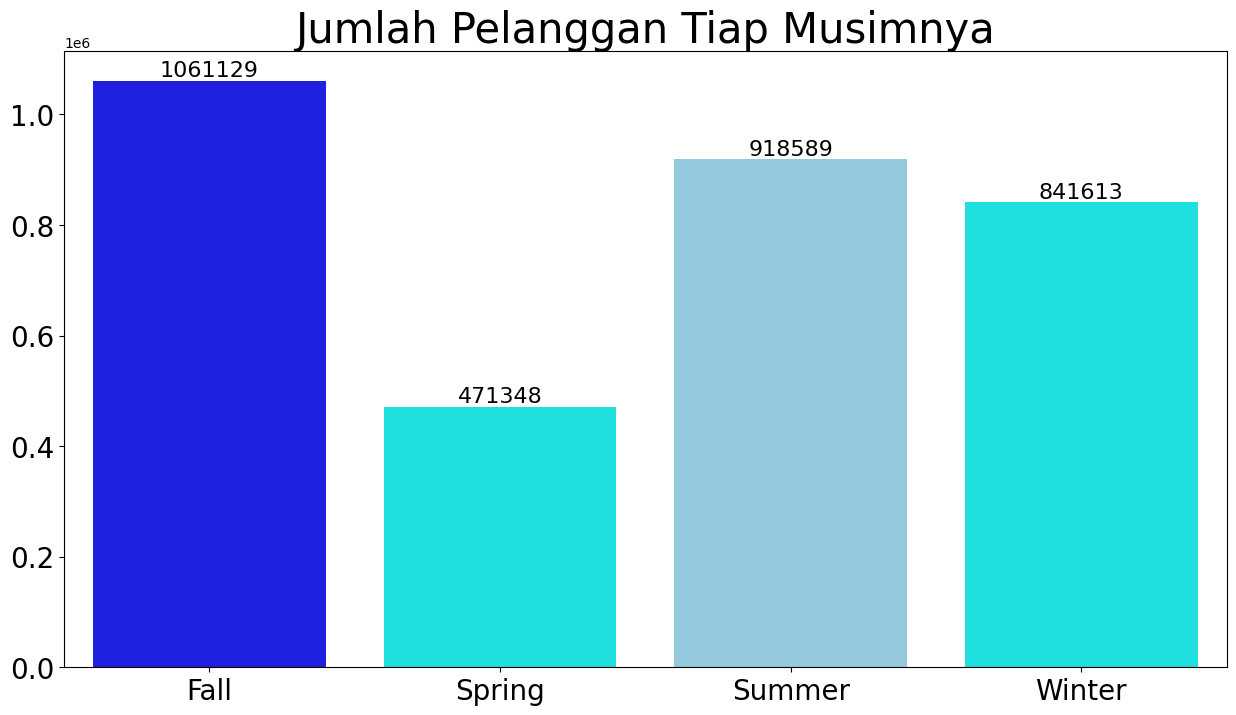

In [35]:
# Menghitung pelanggan tiap musimnya dengan groupby
colors = ["blue", "cyan", "skyblue", "aqua"]
pivot = hari_df.groupby('season')['cnt'].sum()

# Membuat barplot berdasarkan pivot_data yang telah dihitung
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(
    x=pivot.index,
    y=pivot.values,
    palette=colors,
    ax=ax
)

# Menambahkan data label pada tiap barplot
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 5,
        f'{p.get_height():.0f}',
        ha='center',
        va='bottom',
        fontsize=16,
        color='black'
    )

# Menambahkan judul dan label
ax.set_title("Jumlah Pelanggan Tiap Musimnya", loc="center", fontsize=30)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Menampilkan plot
plt.show()



dari diagram barplot diatas dapat disimpulkan , bahwa pada musim fall (musim gugur) total pelanggan sebesar 1061129 dibandingkan musim hujan ( spring) yang hanya 471348

### Pertanyaan 2:
Bagaimana trend penjualan sistem sewa sepeda dalam beberapa tahun ini?

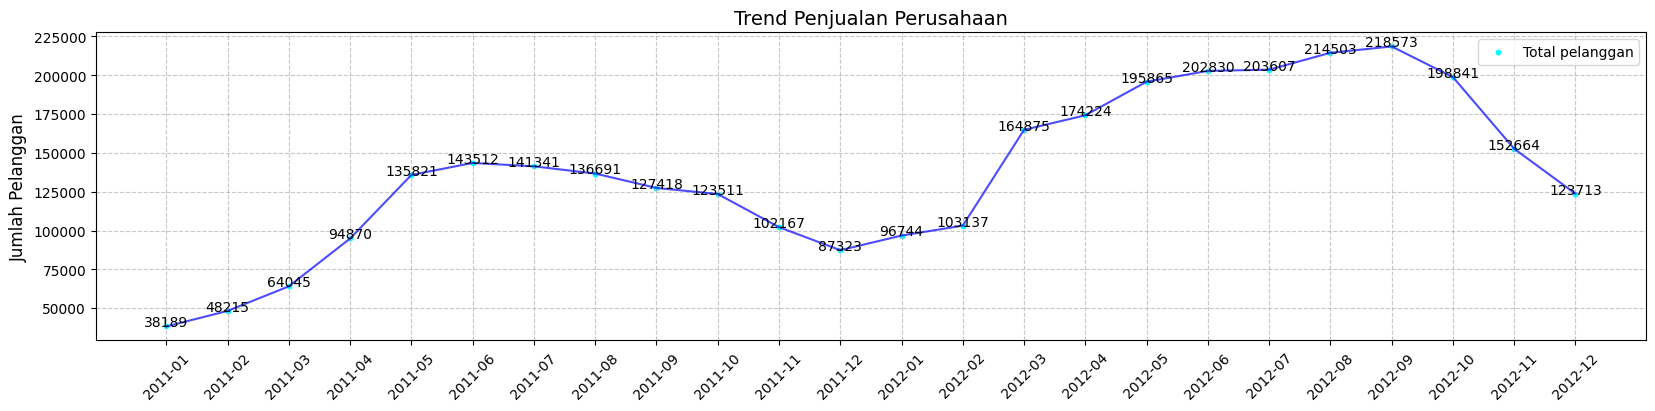

In [67]:

# Membuat figure dengan ukuran (20, 4)
plt.figure(figsize=(20, 4))

# Mengonversi kolom 'dteday' ke format datetime jika belum
hari_df["dteday"] = pd.to_datetime(hari_df["dteday"])

# Menghitung jumlah pelanggan maksimum per bulan
trend_bulanan = hari_df.groupby(hari_df["dteday"].dt.to_period("M"))["cnt"].sum()

# Membuat scatter plot serta mengatur sumbu, judul, dan grid
plt.scatter(trend_bulanan.index.astype(str), trend_bulanan.values, c="cyan", s=10, marker='o', label="Total pelanggan")
plt.plot(trend_bulanan.index.astype(str), trend_bulanan.values, linestyle="-", color="blue", alpha=0.7)

# Menambahkan data label di setiap titik
for i, txt in enumerate(trend_bulanan.values):
    plt.text(trend_bulanan.index.astype(str)[i], txt + 5, f"{txt:.0f}", ha="center", fontsize=10, color="black")


plt.grid(True, linestyle="--", alpha=0.7)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.title("Trend Penjualan Perusahaan", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.show()

Pada diagram diatas dapat kita lihat bahwa total pelanggan terbanyak ada di bulan september 2012 sebesar 218573, sedangkan total pelanggan paling sedikit di bulan januari 2011 sebesar 38189

### Pertanyaan 3:
Berapa jumlah perbandingan dari pelanggan yang registrasi dengan yang casual?

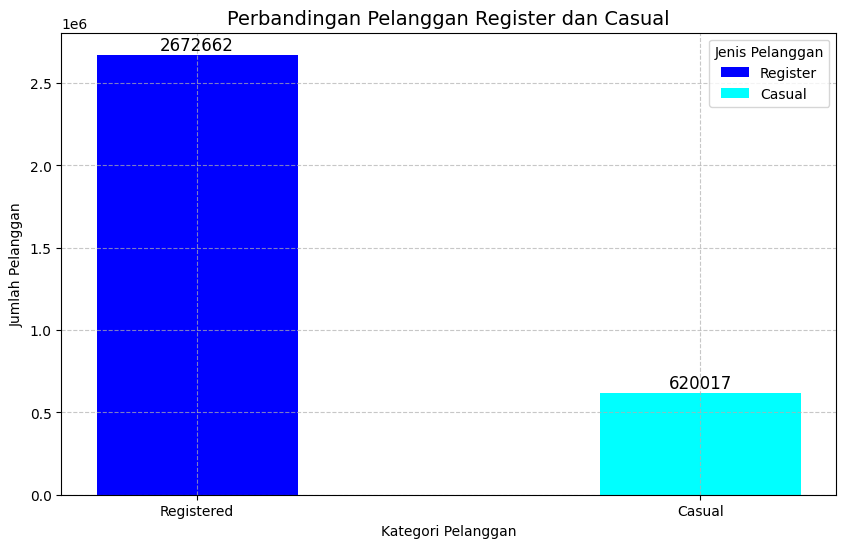

In [ ]:
# Membuat figure
plt.figure(figsize=(10, 6))

# membuat variable jumlah dan pengguna
pengguna = ['Registered', 'Casual']
jumlah = [hari_df['registered'].sum(), hari_df['casual'].sum()]

# Menentukan posisi sumbu-x
x_pos = [0, 1]  # Posisi untuk "Registered" dan "Casual"

# Membuat bar chart
bars=plt.bar(x_pos[0], jumlah[0], width=0.4, label='Register', align='center', color='blue')
bars2=plt.bar(x_pos[1], jumlah[1], width=0.4, label='Casual', align='center', color='cyan')


# Menambahkan label data pada setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{bar.get_height():.0f}', ha='center', va='bottom', color='black', fontsize=12)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f'{bar.get_height():.0f}', ha='center', va='bottom', color='black', fontsize=12)

# Menambahkan label dan judul
plt.xticks(x_pos, pengguna)  # Menambahkan label untuk x-axis
plt.grid(True, linestyle='--', alpha=0.7)  # Menambahkan grid dengan garis putus-putus
plt.xlabel('Kategori Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.title('Perbandingan Pelanggan Register dan Casual', fontsize=14)
plt.legend(title="Jenis Pelanggan")



# Menampilkan plot
plt.show()


diagram diatas menjelaskan bahwa jumlah pengguna yang melakukan registered lebih banyak dari pada yang casual yaitu registered= 2672662 sedangkan casual hanya 620017

## Analisis Lanjutan (Opsional)

Metode clustering

In [ ]:
#mengelompokan total pengguna berdasrkan cuaca
jam_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)


,cnt
weathersit,
Clear,848
Misty,649
Light_rainsnow,368
Heavy_rainsnow,3


disini kita bisa tahu , bahwa orang orang lebih banyak menyewa sepeda ketika cuaca cerah ketimbang saat cuaca hujan lebat

In [76]:
jam_df.groupby(by="humidity_category").agg({
    "cnt": ["count"]})

,cnt
,count
humidity_category,
Ideal,5505
Terlalu Lembab,8356
Terlalu kering,3518


disini kita bisa lihat , total pengguna yang menyewa sepeda paling banyak di kondisi humidity terlalu lembab yaitu sebesar 8356

## Conclusion

- Conclution pertanyaan 1 :berdasarkan diagram barplot, dapat kita ketahui bahwa total pengguna tiap musimnya paling banyak ada di musim fall(gugur) sebanyak 1.061.129, sedangkan paling sedikit ada dimusim spring (semi) sebanyak 471348.
- Conclution pertanyaan 2 : berdasarkan diagram scatter, dapat kita ketahui bahwa total penjualan perusahaan dalam beberapa tahun terakhir mengalami peningkatan signifikat di bulan september 2012 dimana total pelanggan sebanyak 218573, dibandingkan dengan bulan januari 2011 yang hanya mencapai sebanyak 38189.
- Conclution pertanyaan 3 : berdasarkan diagram barchart kita tahu bahwa jumlah pengguna yang sudah melakukan registrasi lebih banyak ketimbang yg belum melakukan registrasi (casual), dimana total pengguna yg sudah melakukan registrasi sebanyak 2.672.662 (81.2%), sedangkan casual sebanyak 620.017 (18.8%)